In [6]:
import matplotlib.pyplot as plt
import numpy as np

Tcomm=10**-6
Tcomp=2*10**-9
Tread=10**-4

#n=[20000, 100000, 200000, 1000000, 20000000]
#n=np.linspace(10000, 10000000, 10000, dtype=int)
n=[]
n.append(1000)
for i in range(1,10000):
    n.append(1000+n[i-1])
n=np.asarray(n)
S=np.zeros((100,len(n)))
maxim=np.zeros((len(n)))
minim=np.zeros((len(n)))
i=0
f = open('performance-model.csv','w')
f.write("#header: N, best P naive algorithm , best P for enhanced algorithm if any\n\n####\n")
best_Ps=[]
for N in n:
    T_ser=N*Tcomp

    T_p=[ (Tcomp*(P-1+N/P) + Tread + 2*(P-1)*Tcomm) for P in range(1,101)]
    T_p = np.asarray(T_p)

    S[:,i] = T_ser/T_p
    maxim[i] = max(S[:,i])
    minim[i] = min(S[:,i])
    pos=(np.where(S[:,i]==maxim[i]))[0]
    best_Ps.append(pos)
    #print(N,", ", pos)
    posx="XXX"
    f.write('%-10d,%6s,%6s\n' %(N,pos,posx))
    i=i+1
f.close()
best_Ps = np.asarray(best_Ps)

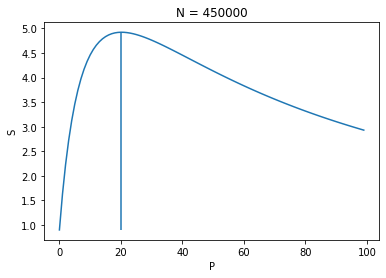

In [12]:
idx=449
_= plt.plot(S[:,idx])
_= plt.vlines(np.where(S[:,idx]==maxim[idx]),minim[idx],maxim[idx])
_= plt.title("N = %d"%n[idx])
_= plt.xlabel("P")
_= plt.ylabel("S")

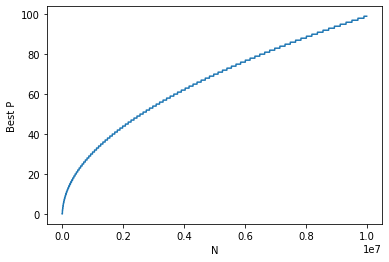

In [8]:
_=plt.plot(n,best_Ps)
_= plt.xlabel("N")
_= plt.ylabel("Best P")